In [1]:
import os
os.chdir('/Users/alexbaranski/GitHub/DEP_elegans/src')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import utils as utils
from sklearn.decomposition import PCA
import scipy
from scipy.signal import argrelextrema

%matplotlib notebook

In [2]:
datadir = '/Users/alexbaranski/GitHub/DEP_elegans/data/config_0x0--[2021_02_16--21_04_37]'

In [3]:
snsr_data = utils.load_data([datadir, 'snsr'], 'nparray')
ctrl_data = utils.load_data([datadir, 'ctrl'], 'nparray')

In [4]:
# snsr_data = snsr_data[:1000000]
# ctrl_data = ctrl_data[:1000000]

In [5]:
snsr_nparray = np.concatenate([np.expand_dims(i,1) for i in snsr_data], 1).transpose()
for i in range(0, snsr_nparray.shape[1], 2):
    snsr_nparray[:,i] = snsr_nparray[:,i] / 10
ctrl_nparray = np.concatenate([np.expand_dims(i,1) for i in ctrl_data], 1).transpose()
for i in range(0, ctrl_nparray.shape[1], 2):
    ctrl_nparray[:,i] = ctrl_nparray[:,i] / 10

In [6]:
snsr_PCA = PCA(n_components=44)
snsr_PCA.fit(snsr_nparray)
pca_snsr = snsr_PCA.transform(snsr_nparray)

ctrl_PCA = PCA(n_components=44)
ctrl_PCA.fit(ctrl_nparray)
pca_ctrl = ctrl_PCA.transform(ctrl_nparray)

In [7]:
snsr_variance = [i * 100 for i in snsr_PCA.explained_variance_ratio_]
ctrl_variance = [i * 100 for i in ctrl_PCA.explained_variance_ratio_]

for i in range(len(snsr_variance)):
    print('{:.2f} - {:.2f}'.format(snsr_variance[i], ctrl_variance[i]))

45.87 - 56.83
42.49 - 37.19
5.06 - 4.98
0.90 - 0.52
0.83 - 0.34
0.73 - 0.08
0.54 - 0.03
0.47 - 0.00
0.42 - 0.00
0.37 - 0.00
0.32 - 0.00
0.28 - 0.00
0.26 - 0.00
0.22 - 0.00
0.20 - 0.00
0.13 - 0.00
0.13 - 0.00
0.12 - 0.00
0.11 - 0.00
0.09 - 0.00
0.08 - 0.00
0.07 - 0.00
0.06 - 0.00
0.04 - 0.00
0.04 - 0.00
0.03 - 0.00
0.03 - 0.00
0.02 - 0.00
0.02 - 0.00
0.01 - 0.00
0.01 - 0.00
0.01 - 0.00
0.01 - 0.00
0.01 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00
0.00 - 0.00


In [8]:
mean_ctrl = np.mean(np.abs(ctrl_nparray),1)
d_mean_ctrl_data = mean_ctrl[1:]-mean_ctrl[:-1]

<IPython.core.display.Javascript object>


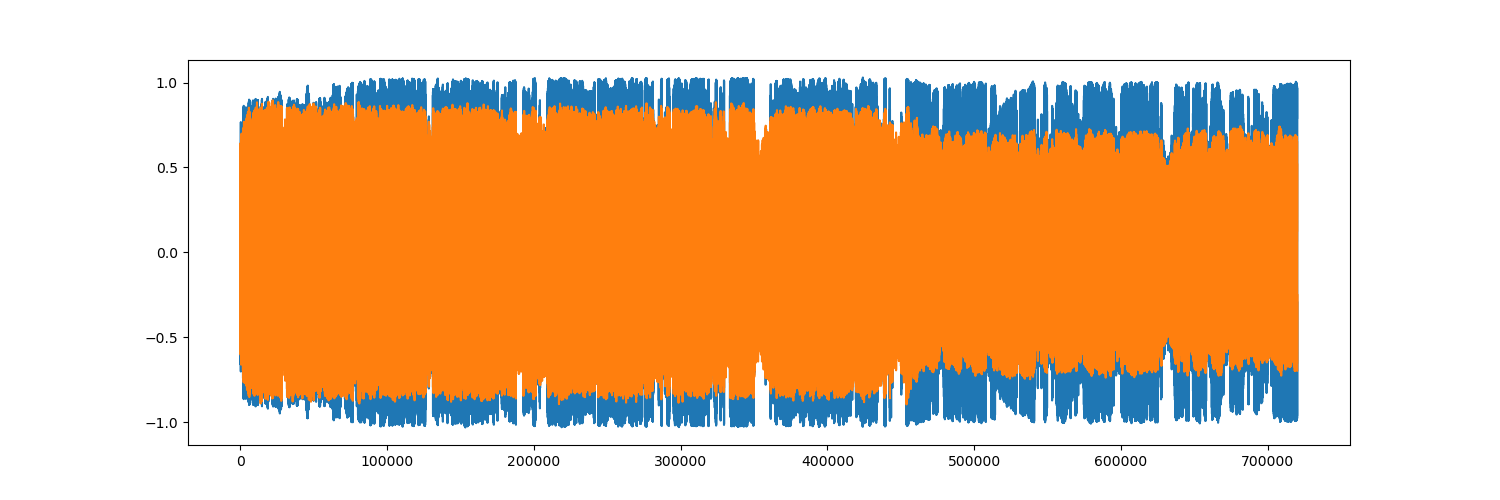

In [11]:
f = plt.figure(figsize=(15,5))
plt.plot(-pca_ctrl[:,0]/4)
plt.plot(pca_snsr[:,0])

In [ ]:
sdmc_data = scipy.ndimage.gaussian_filter1d(d_mean_ctrl_data, 0.5)

In [ ]:
maxima_idxs = argrelextrema(sdmc_data[:1000000], np.greater)[0]
minima_idxs = argrelextrema(sdmc_data[:1000000], np.less)[0]

In [ ]:
d_mean_ctrl_data[minima_idxs[:-1]]

In [ ]:
r = 0.0001
amcd = np.abs(d_mean_ctrl_data)
minima_diff = amcd[minima_idxs[1:]] - amcd[minima_idxs[:-1]]
# minima_ratio = np.divide(amcd[minima_idxs[1:]]+r, amcd[minima_idxs[:-1]]+r)

In [ ]:
f = plt.figure(figsize=(15,5))
plt.xlim(0,1000000)
# plt.xlim(1450,1800)
# plt.ylim(-.35, .1)
plt.plot(d_mean_ctrl_data)
plt.plot(minima_idxs[1:], minima_diff)
plt.scatter(minima_idxs, d_mean_ctrl_data[minima_idxs], 2, color=[1,0,0])
# plt.plot(minima_idxs[1:], minima_diff)

# plt.plot(d_mean_ctrl_data[minima_idxs[:]])
# plt.plot(d_mean_ctrl_data[:1000000])
# plt.plot(minima_ratio/1000)

In [ ]:
f = plt.figure()
plt.hist(np.abs(d_mean_ctrl_data[d_mean_ctrl_data < -0.135]), 20, density=True)
plt.title('Behavioral collapse size distribution')
plt.xlabel('Behavioral collapse size')
plt.ylabel('Density')

In [ ]:
f = plt.figure(figsize=(15,5))
L = 0.7
plt.plot(pca_snsr[:,0]*3, color=[0,0,1])
plt.plot(pca_snsr[:,1]*3, color=[L,L,1])
plt.plot(pca_ctrl[:,0], color=[1,0,0])
plt.plot(pca_ctrl[:,1], color=[1,L,L])
# plt.scatter(pca_snsr[:10000,1], pca_ctrl[:10000,1], 1)

In [ ]:
length = 10000

start_i = 60000
end_i = start_i + length

f = plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(pca_snsr[start_i:end_i,0], pca_ctrl[start_i:end_i,0], 1)
plt.title('sensor PCA comp. 1 vs control PCA comp. 1')

plt.subplot(2,2,2)
plt.scatter(pca_snsr[start_i:end_i,0], pca_ctrl[start_i:end_i,1], 1)
plt.title('sensor PCA comp. 1 vs control PCA comp. 2')

plt.subplot(2,2,3)
plt.scatter(pca_snsr[start_i:end_i,1], pca_ctrl[start_i:end_i,0], 1)
plt.title('sensor PCA comp. 2 vs control PCA comp. 1')

plt.subplot(2,2,4)
plt.scatter(pca_snsr[start_i:end_i,1], pca_ctrl[start_i:end_i,1], 1)
plt.title('sensor PCA comp. 2 vs control PCA comp. 2')


In [ ]:
def get_x_and_y_pos(angles):
    xs = list()
    ys = list()
    xs.append(0)
    ys.append(0)
    for i in range(0, len(angles), 2):
        theta = angles[i]
        xs.append(xs[-1] + np.cos((theta*30)/360*np.pi))
        ys.append(ys[-1] + np.sin((theta*30)/360*np.pi))
    return xs, ys
    
    
print(pca.components_[0])
f = plt.figure()
for i in [0,1]:
    xs, ys = get_x_and_y_pos(pca.components_[i])
    plt.plot(xs, ys)
plt.show()
#pca.inverse_transform(pca.components_[0])

In [ ]:
f = plt.figure(figsize=(15,5))
plt.plot(pca_snsr[:,0])
plt.plot(pca_snsr[:,1])
plt.plot(pca_snsr[:,2])
plt.plot(pca_snsr[:,3])
plt.plot(pca_snsr[:,4])

In [ ]:
f = plt.figure(figsize=(10,10))
plt.scatter(pca_snsr[:50000,0], pca_snsr[:50000,1], 1)

In [ ]:
ctrl_data = utils.load_data([datadir, 'ctrl'], 'nparray')

In [ ]:
nparray = np.concatenate([np.expand_dims(i,1) for i in ctrl_data], 1).transpose()

In [ ]:
nparray.shape

In [ ]:
pca = PCA(n_components=nparray.shape[1])
pca.fit(nparray)

In [ ]:
1/sum(pca.explained_variance_ratio_**2)

In [ ]:
pca_nparray = pca.transform(nparray)

In [ ]:
def sub_pca_spectrum(arr, index, length):
    pca = PCA(n_components=arr.shape[1])
    pca.fit(arr[(index-length):index,:])
    return 1/np.sum(pca.explained_variance_ratio_ ** 2)

In [ ]:
# sub_pca_spectrum(nparray, 100004, 100)
period = 100
start_time = period
end_time = 550000

ctrl_dim = [sub_pca_spectrum(nparray, i, period) for i in range(start_time, end_time)]
time = [t for t in range(start_time, end_time)]

In [ ]:
mean_ctrl = np.mean(np.abs(nparray),1)
d_mean_ctrl = mean_ctrl[1:]-mean_ctrl[:-1]
print(mean_ctrl.shape)

In [ ]:
# f3 = plt.figure(figsize=(15,5))
# plt.plot(mean_ctrl[0:25000])
# plt.plot(d_mean_ctrl[0:25000])

In [ ]:
f = plt.figure(figsize=(15,5))

plt.plot(time, pca_nparray[start_time:end_time,0], color=[1,.4,.4])
plt.plot(time, pca_nparray[start_time:end_time,1], color=[.4,1,.4])
plt.plot(time, pca_nparray[start_time:end_time,2], color=[.4,.4,1])
plt.plot(time, pca_nparray[start_time:end_time,3], color=[1,1,.4])
plt.plot(time, ctrl_dim, color=[0,0,0])

In [ ]:
f2 = plt.subplots(figsize=(15,9))

pltstart1 = 362000
pltend1 = 364000

pltstart2 = 370000
pltend2 = 372000

index = 0
for dim1 in range(6):
    for dim2 in range(dim1+1, 6):
        index += 1
        plt.subplot(3, 5, index)
        plt.scatter(pca_nparray[pltstart1:pltend1,dim1], pca_nparray[pltstart1:pltend1,dim2], 1)
        plt.scatter(pca_nparray[pltstart2:pltend2,dim1], pca_nparray[pltstart2:pltend2,dim2], 1)
        plt.title(str(dim1) + ' vs. ' + str(dim2))

In [ ]:
mean_ctrl_data = np.array([np.mean(np.abs(i)) for i in ctrl_data])

In [ ]:
d_mean_ctrl_data = mean_ctrl_data[1:]-mean_ctrl_data[:-1]
f = plt.figure(figsize=(15,5))
plt.plot(d_mean_ctrl_data[0:10000])

In [ ]:
f = plt.figure(figsize=(15,5))
plt.plot(d_mean_ctrl_data[0:10000])

In [ ]:
# 2500 to 2600 there is a big 'collapse'

In [ ]:
# brain_data = utils.load_data([datadir, 'brain'], 'object', start=2500, end=2600)

In [ ]:
# f2 = plt.figure(figsize=(10,5))
# index = 2505
# plt.suptitle(str(index))

# plt.subplot(1,2,1)
# plt.imshow(brain_data[index-2500].M)

# plt.subplot(1,2,2)
# plt.imshow(brain_data[index-2500].C)
